In [1]:
import utils
import environment
import copy

utils.seed_all(seed = 0)

In [2]:
# test env
duration = 300
lanes = ['F', 'L', 'R']
directions = ['N', 'E', 'S', 'W']
A = [(['E', 'W'], ['F']), (['E', 'W'], ['L']), 
    (['N', 'S'], ['F']), (['N', 'S'], ['L']), 
    (['E'], ['F', 'L']), (['W'], ['F', 'L']), 
    (['N'], ['F', 'L']), (['S'], ['F', 'L'])]
vehicle_parameters = {'duration': duration, 'min_speed': 2.22, 'max_speed': 13.33, 
                      'lanes': lanes, 'arrival_rates': {'E': 5/60, 'N': 5/60, 'W': 10/60, 'S': 7/60}}
intersection_parameters = {'duration': duration, 'action_duration': 10, 
                           'Lanes': lanes, 'Directions': directions, 'A': A, 
                           'gamma': 0.95, 'alpha': 0.1, 'espilon': 0.1, 'is_mem_based':False,  
                           'is_dynamic_action_duration': False, 'dynamic_action_duration': 4, 
                           'reward_function': utils.calculate_reward_default, 'n_vehicle_leaving_per_lane': 1}
graph_structure_params = {'rows': 1, 'cols': 2, 'length': 60}
communcation_parameters = {'A': A, 'mu': 0.0, 'sigma': 1.0, 'tau': 0.0}



env_SARSA = environment.Env(duration=duration, update_type= 'partial', comm_based = True, graph_structure_parameters=graph_structure_params, 
          vehicle_parameters=vehicle_parameters, intersection_parameters=intersection_parameters,
          communication_parameters=communcation_parameters)

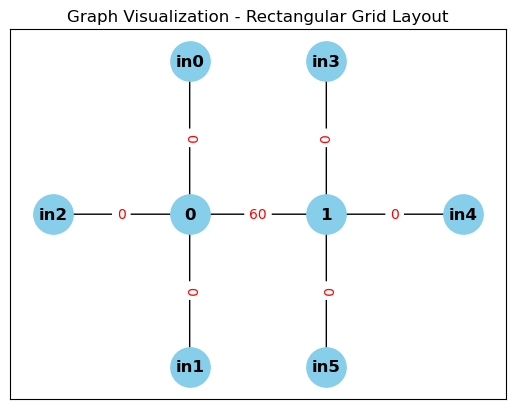

Images combined and saved as 'plots/not_memory_based/combined/Intersection0.png'


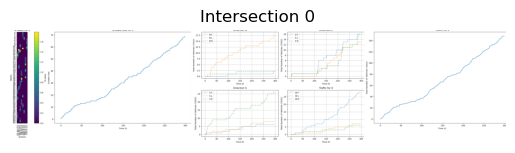

Images combined and saved as 'plots/not_memory_based/combined/Intersection1.png'


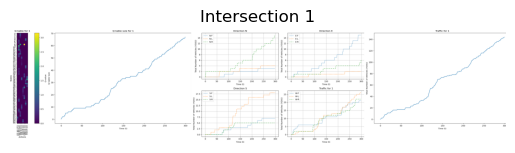

In [3]:
env_SARSA.SARSA_run(n_episodes=1)
env_SARSA.plot_env()

In [4]:
test_graph, test_vehicles = env_SARSA.generate_test_structures(graph_structure_parameters=graph_structure_params, 
                                                               vehicle_parameters=vehicle_parameters, 
                                                               intersection_parameters=intersection_parameters)

In [5]:
test_graph_mem = copy.deepcopy(test_graph)
test_graph_mem = env_SARSA.copy_q_table(from_graph=test_graph, to_graph=test_graph_mem)
test_vehicles_mem= test_vehicles.copy(new_graph=test_graph_mem)

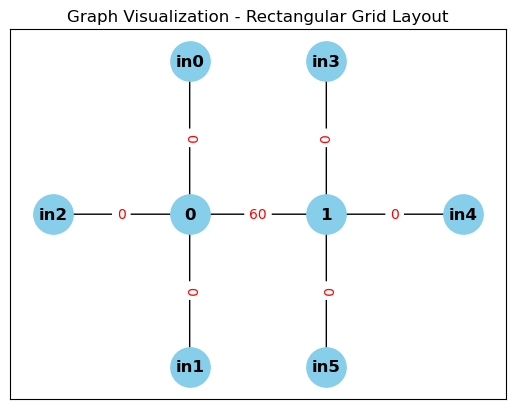

Images combined and saved as 'plots/not_memory_based/combined/Intersection0.png'


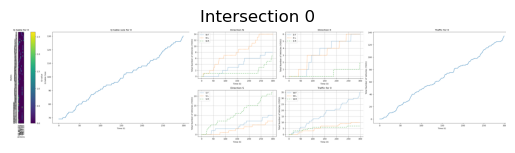

Images combined and saved as 'plots/not_memory_based/combined/Intersection1.png'


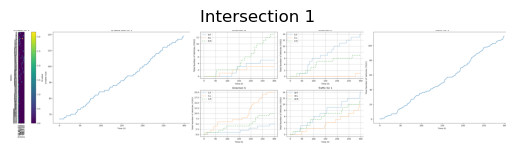

W: total average weight time per lane: 2.814037788000543s
average weight time per node in s (nan means no cars arrived):
 {'0': 4.091289004870338, '1': 1.3239113683191162}
Total arriving cars: 64


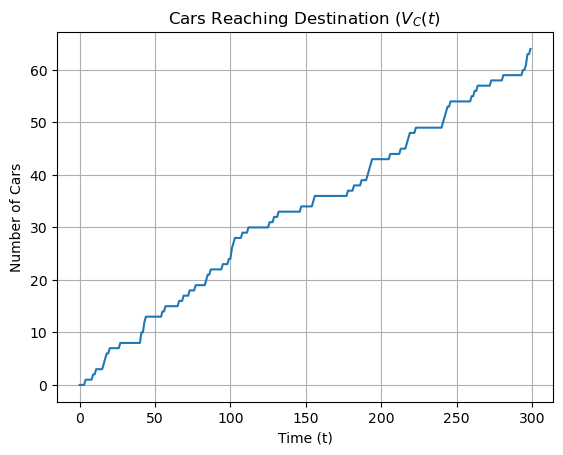

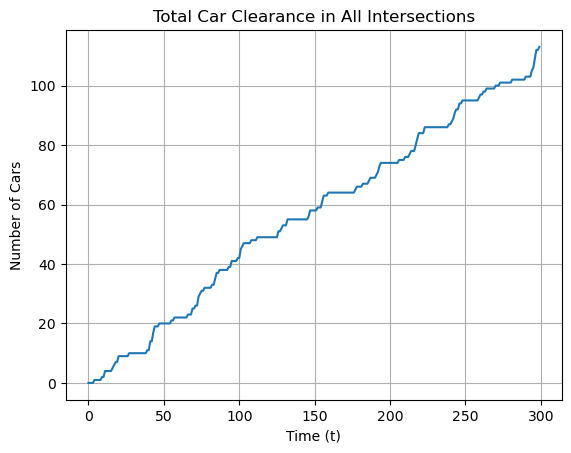

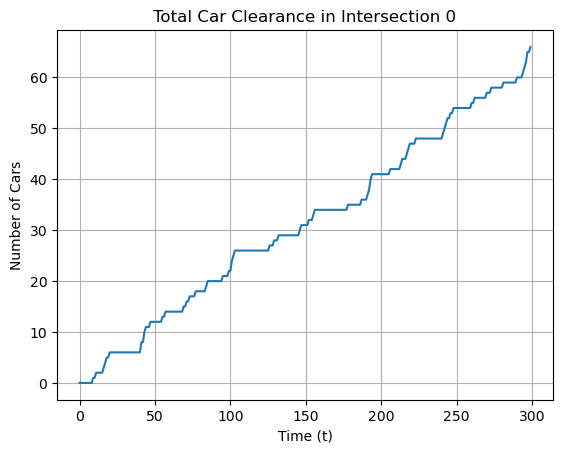

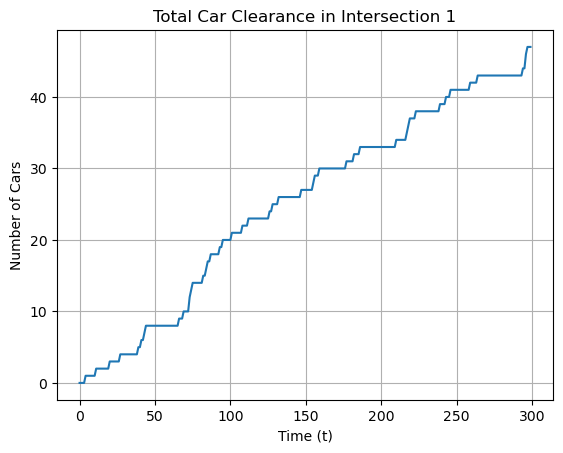

In [6]:
env_SARSA.test(test_graph=test_graph, test_vehicles=test_vehicles, update_epoch = 25)
env_SARSA.plot_env()
env_SARSA.display_congestion_metric()

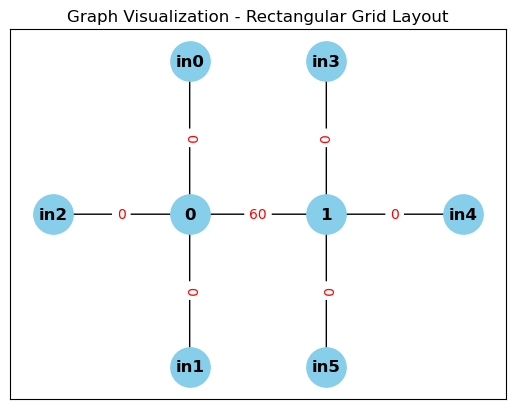

Images combined and saved as 'plots/memory_based/combined/Intersection0.png'


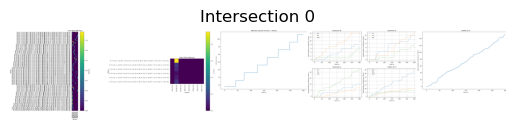

Images combined and saved as 'plots/memory_based/combined/Intersection1.png'


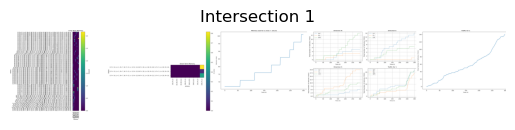

W: total average weight time per lane: 32.86911945024663s
average weight time per node in s (nan means no cars arrived):
 {'0': 34.283704889465014, '1': 31.468334844581573}
Total arriving cars: 128


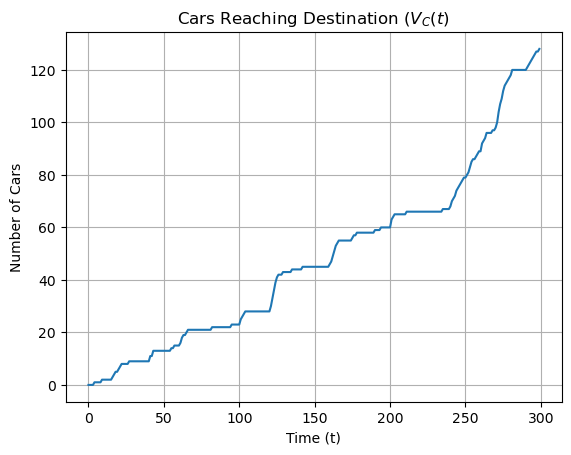

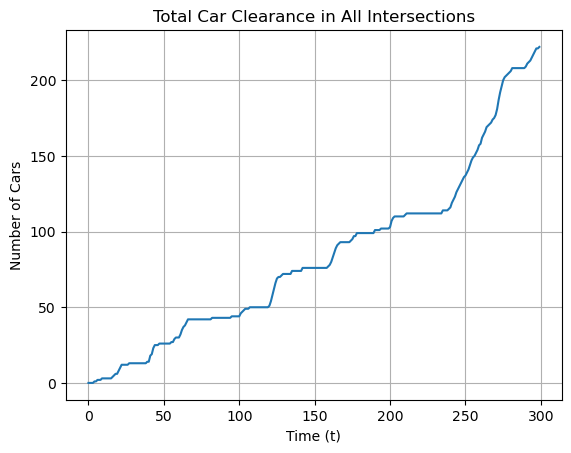

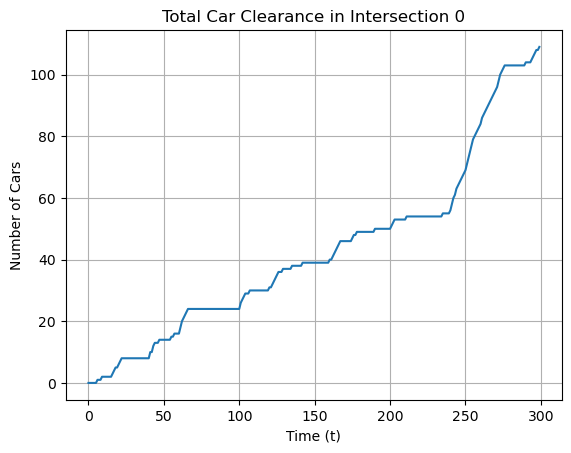

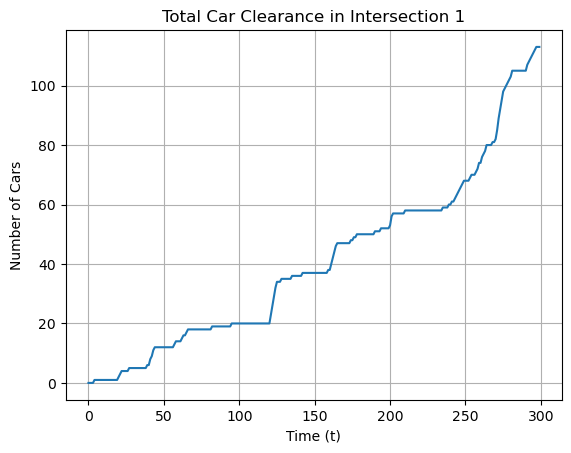

In [7]:
test_graph.set_memory_based(is_mem_based=True)

env_SARSA.test(test_graph=test_graph, test_vehicles=test_vehicles, update_epoch = 25)
env_SARSA.plot_env()
env_SARSA.display_congestion_metric()

In [ ]:
test_graph.set_memory_based(is_mem_based=True)

env_SARSA.test(test_graph=test_graph, test_vehicles=test_vehicles, update_epoch = 25)
# env_SARSA.plot_env()
env_SARSA.display_congestion_metric()

In [ ]:
a = pd.DataFrame({'a':[1,3,2,1], 'b': [1,1,1,1]})
b = pd.DataFrame({'a':[11,13,12,21], 'b': [121,12,121,14]})
a['state'] = a.index
b['state'] = b.index

In [ ]:
a.set_index('state')
a.index.name

In [ ]:
c = pd.merge(a, b, on = 'state', how = 'inner', suffixes = ['', '_old'])
c.loc[:, ~c.columns.str.endswith('_old')]

In [ ]:
a['state'].apply(lambda x: x+1)

In [ ]:
a

In [ ]:
import numpy as np
b = np.array([0, 0, 0, 0])

In [ ]:
c = '-'.join(b.astype(str))

In [ ]:
np.array(c.split('-')).astype(int)

In [ ]:
import numpy as np
import pickle

In [ ]:
np.load('metrics/run_2_2/total_arriving_2_2_mem_False_comm_False.npy')

In [ ]:
np.load('metrics/run_2_2/total_waiting_time_2_2_mem_False_comm_False.npy')

In [ ]:
np.load('metrics/run_2_2/total_clearance_2_2_mem_False_comm_False.npy')

In [ ]:
with open('metrics/run_2_2/node_clearance_2_2_mem_False_comm_False.pickle', 'rb') as f:
    a = pickle.load(f)
a

In [ ]:
with open('metrics/run_2_2/node_waiting_time_2_2_mem_False_comm_False.pickle', 'rb') as f:
    a = pickle.load(f)
a